# Selenium 설치
pip install selenium

# Chrome Webdriver 설치
https://sites.google.com/a/chromium.org/chromedriver/downloads 에서 다운로드

## 페이지의 단일 element에 접근하는 함수들

## 페이지의 여러 elements에 접근하는 함수들

# Selenium 실전 적용 (네이버 메일 크롤링 - 보낸이 추출)
## 네이버 로그인

In [2]:
from selenium import webdriver

driver = webdriver.Chrome('C:/Users/wjssm/Documents/chromedriver')
driver.get("http://naver.com")

## 1. Naver 로그인 창이 바로 나오지 않는 경우
(1) Naver 로그인 버튼 찾기
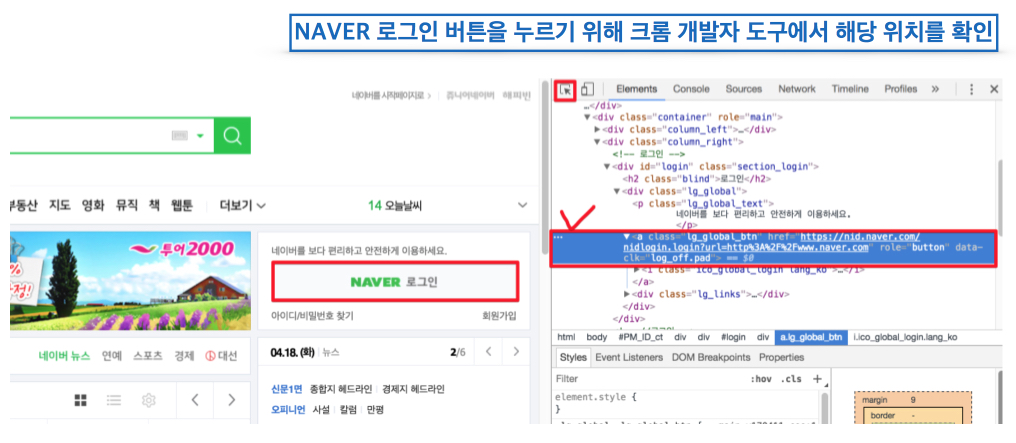

(2) Naver 로그인 버튼 클릭을 위해 xpath 복사
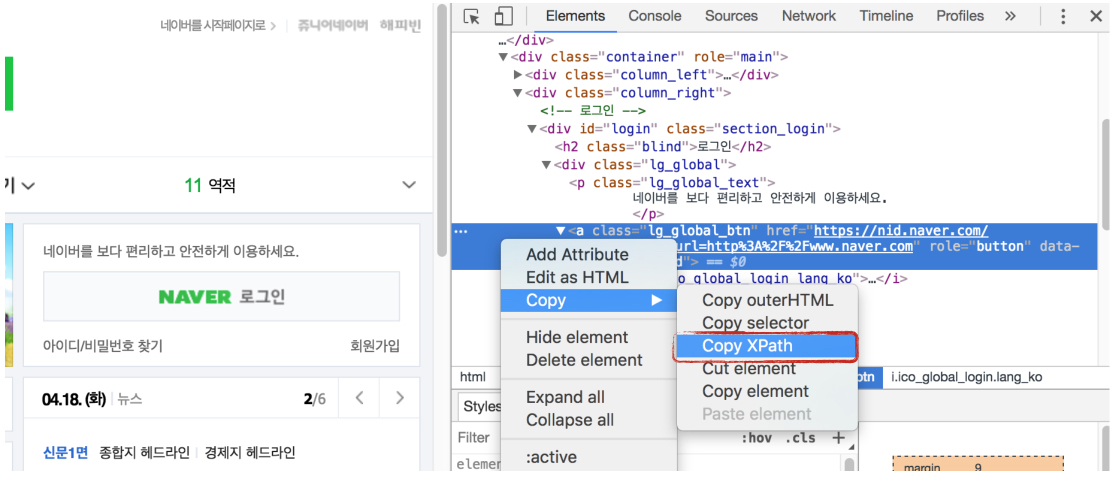

(3) 로그인 창의 ID와 비밀번호가 들어가는 input box의 id 확인
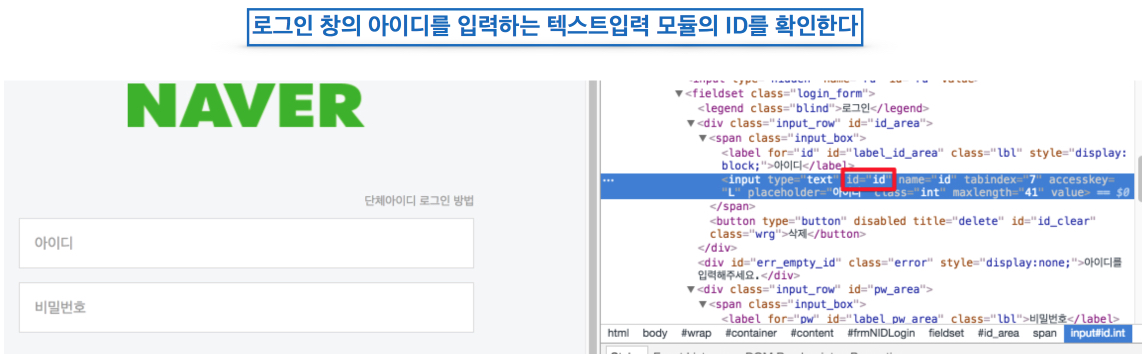

(4) 로그인 버튼 클릭을 위해 로그인 버튼 xpath 복사
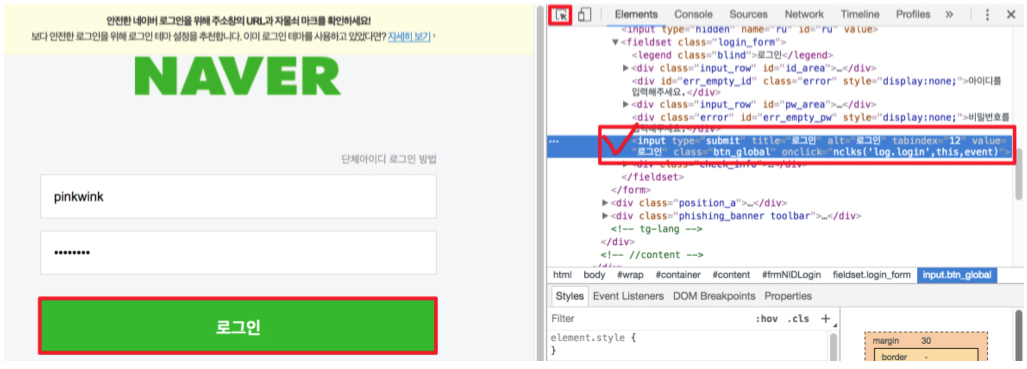

In [3]:
# ID 입력
elem_login = driver.find_element_by_id("id")
elem_login.send_keys("wsm1994")


In [4]:
# Password 입력
elem_login = driver.find_element_by_id("pw")
elem_login.send_keys("thsutleo070805")



In [5]:
# login 버튼 클릭
driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/span/input').click()


## 2. Naver 로그인 창이 바로 나오는 경우
(1) ID와 비밀번호가 들어가는 input box의 id 확인
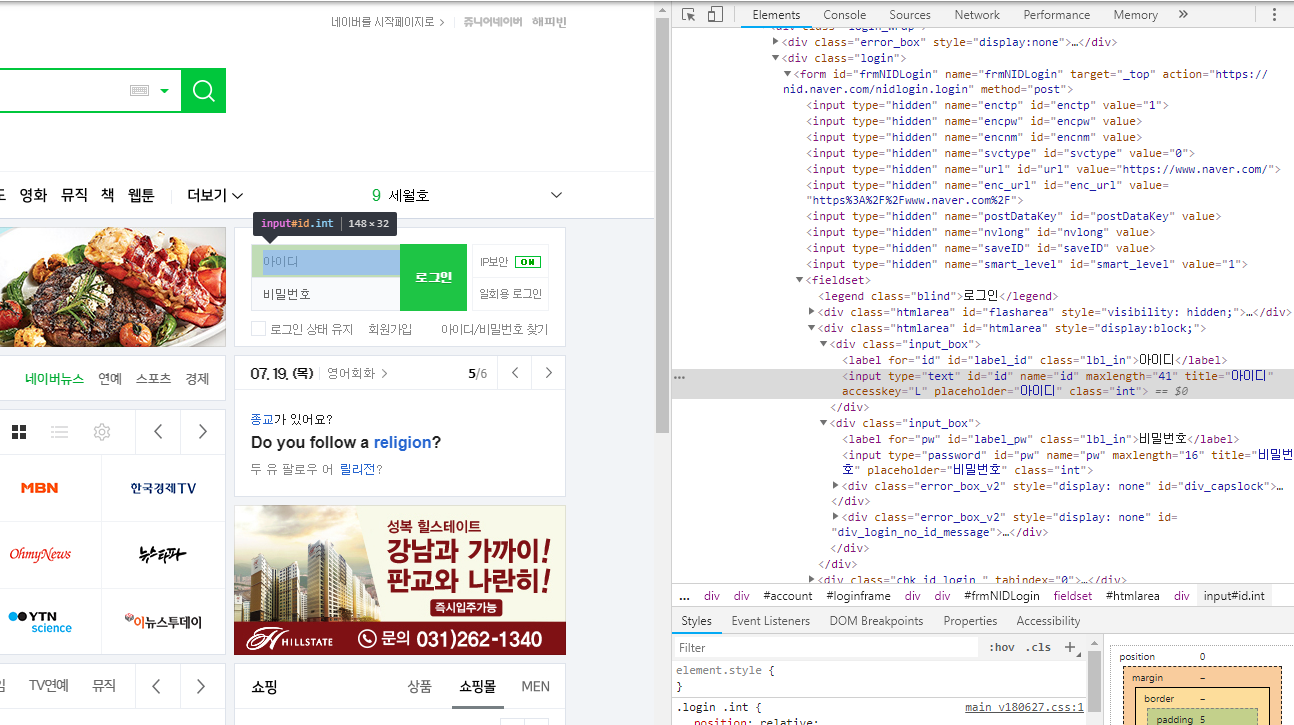

(2) 로그인 버튼의 xpath 복사
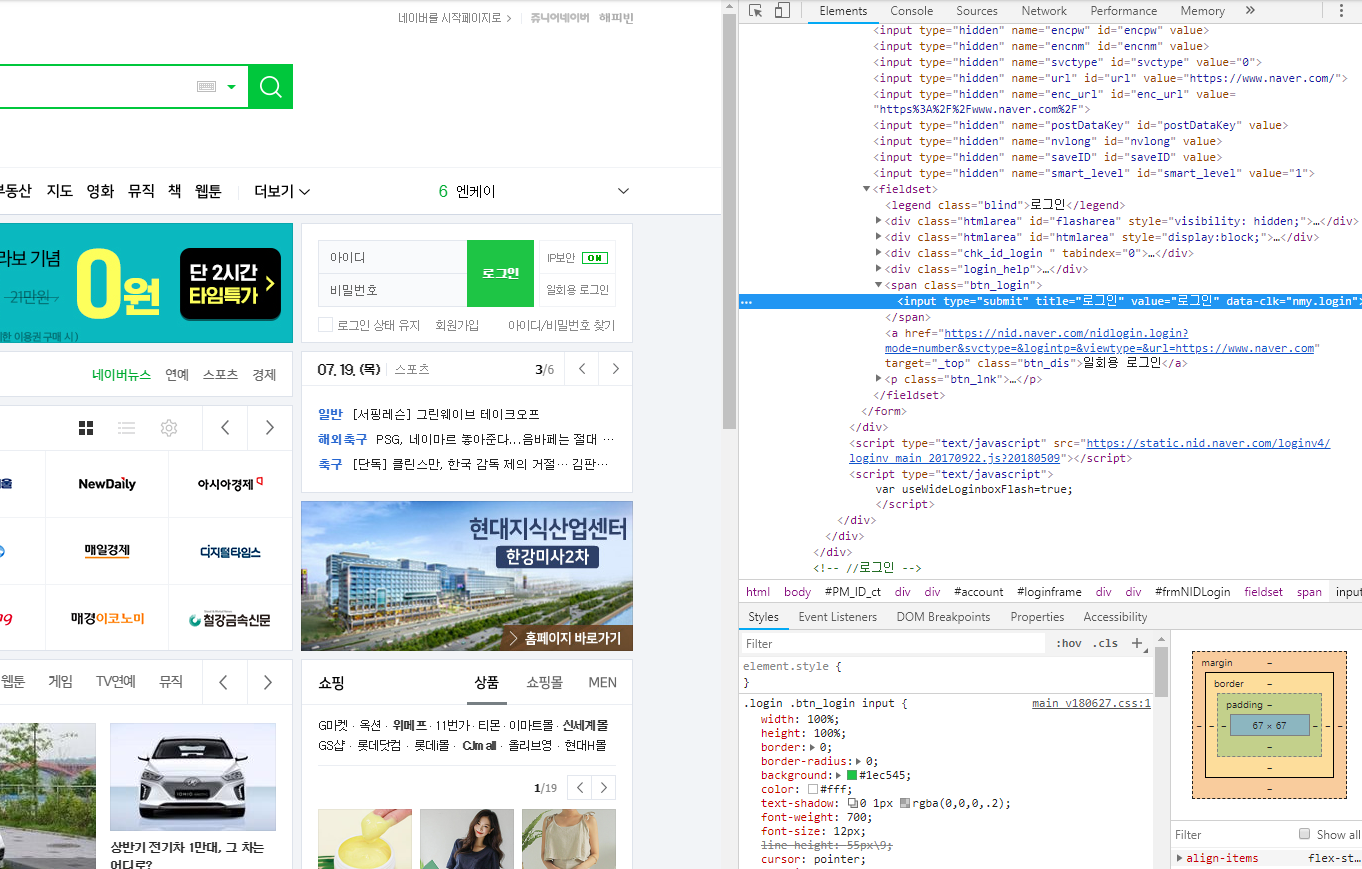

## 메일 크롤링
(메일 리스트에서 보낸 사람의 목록을 찾아서 따로 추출하기)

In [8]:
# 네이버 메일 화면으로 이동
driver.get("http://mail.naver.com")

In [9]:
from bs4 import BeautifulSoup

# 현재 페이지의 주소를 반환
html = driver.page_source #내가 켜놓은 사이트 url
soup = BeautifulSoup(html, 'lxml')

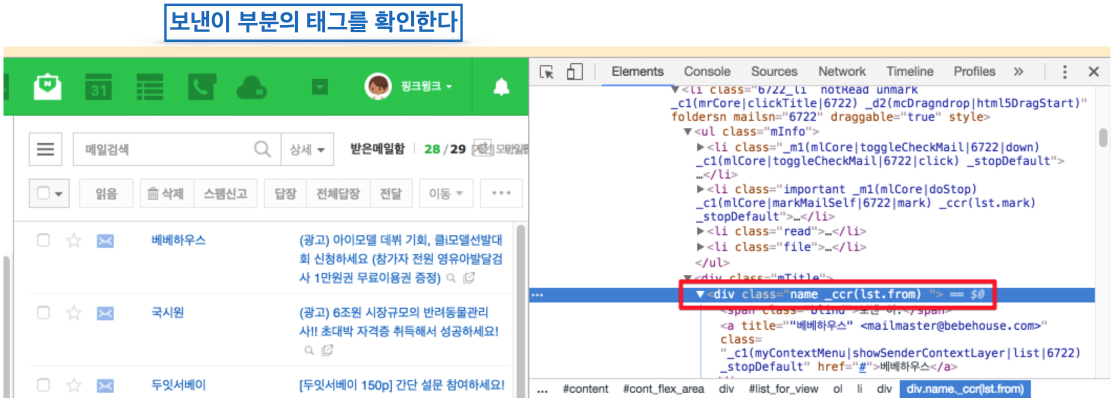

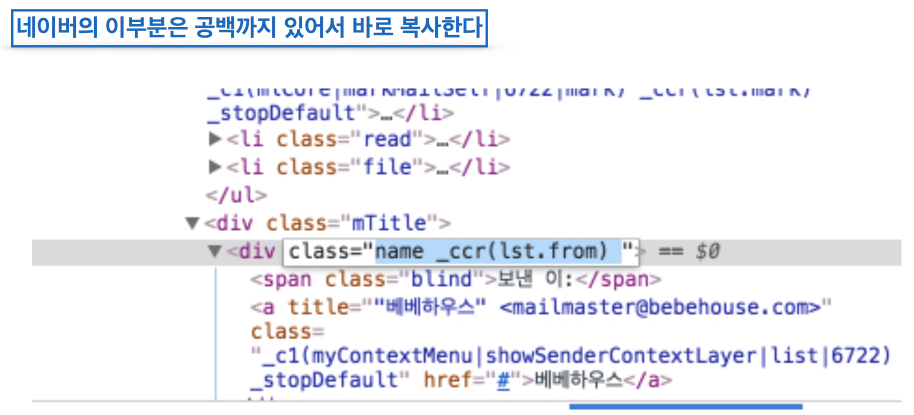

In [10]:
# 보낸이의 div를 가져오기
raw_list = soup.find_all('div', 'name _ccr(lst.from) ')
raw_list

[<div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|7713) _stopDefault" href="#" title='"멜론" &lt;meloninfo7@melon.com&gt;'>멜론</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|7711) _stopDefault" href="#" title='"알라딘 인터넷서점" &lt;cs-center@aladin.co.kr&gt;'>알라딘 인터넷서점</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|7707) _stopDefault" href="#" title='"이은진" &lt;mama830@naver.com&gt;'>이은진</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|7706) _stopDefault" href="#" title='"edwith - Course Staff" &lt;no-reply@edwith.org&gt;'>edwith - Course Staf..</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLay

In [11]:
# get_text() 함수를 이용하여, 보낸이만 추출하기
send_list = [raw_list[n].find('a').get_text() for n in range(len(raw_list))]
send_list

['멜론',
 '알라딘 인터넷서점',
 '이은진',
 'edwith - Course Staf..',
 'SAS코리아',
 'Google',
 'T WORLD',
 'SAS코리아',
 '해피머니',
 'KG이니시스',
 'Data Science Compe..',
 '시나공',
 'Donghwan Lee',
 'Donghwan Lee',
 'CodeGround',
 'Data Science Compe..',
 'boazbigdata',
 '신한카드',
 '멜론',
 'data science compet..']

In [12]:
# 다음 메일 페이지로 이동을 원할 시에 xpath 복사해서 이동
driver.find_element_by_xpath("""//*[@id="2"]""").click()


In [13]:
# get_text() 함수를 이용하여, 보낸이만 추가하기 (extend 함수 사용)
send_list.extend([raw_list[n].find('a').get_text() for n in range(0, len(raw_list))])
send_list

['멜론',
 '알라딘 인터넷서점',
 '이은진',
 'edwith - Course Staf..',
 'SAS코리아',
 'Google',
 'T WORLD',
 'SAS코리아',
 '해피머니',
 'KG이니시스',
 'Data Science Compe..',
 '시나공',
 'Donghwan Lee',
 'Donghwan Lee',
 'CodeGround',
 'Data Science Compe..',
 'boazbigdata',
 '신한카드',
 '멜론',
 'data science compet..',
 '멜론',
 '알라딘 인터넷서점',
 '이은진',
 'edwith - Course Staf..',
 'SAS코리아',
 'Google',
 'T WORLD',
 'SAS코리아',
 '해피머니',
 'KG이니시스',
 'Data Science Compe..',
 '시나공',
 'Donghwan Lee',
 'Donghwan Lee',
 'CodeGround',
 'Data Science Compe..',
 'boazbigdata',
 '신한카드',
 '멜론',
 'data science compet..']